In [1]:
# !pip install pydotplus

# Machine Learning for beginners: Using AI to write simple functions like isEven()
If you wanted to learn some basic machine learning, or you just wanted to find a fancy new way to write the `isEven()` function, you've come to the right place! In this article, I will show you how to leverage on "big data", "A.I." and "machine learning" to write your own `isEven()` function. (LOL)

## Introduction
In this article, you will learn how to code and build a simple machine learning pipeline using scikit-learn libraries in Python. For those that are familliar with machine learning, this article provide you a fun (but dumb) way to write the famous `isEven()` function.

## Prerequisite
- Installed either [Anaconda](https://www.anaconda.com/distribution/) (recommended) or [Miniconda].(https://docs.conda.io/en/latest/miniconda.html)
- Having basic Python or coding knowledge in general. (OPTIONAL)

## Problem Statement
We want to write a function,`isEven()` that can tell whether a given number is an even number, or an odd number. The function will return `True`, if an even number is provided, else, it will return `False`.

In this article, we will tackle this problem by utilizing the power of machine learning and data. We will build a machine learning model that **classify a number as either even or odd**. This is known as a **classifier**, a machine learning model that performs **classification**.

<!-- - img 1 = <img src="img/isEven_1.jpg"> -->
Source: https://www.facebook.com/PoorlyIndented/photos/a.133750464674568/213901103326170/
- img 2 = 

# Disclaimer
While there are many ways to tackle this problem: some of them are creative, some of them are more efficient than the other. Essentially, there are many better way to do this than what this article will teach you. In fact, in reality you wouldn't wanted to use machine learning to tackle simple and well defined problem like this. This tutorial will serve as your springboard to dive into solving more complex problem with machine learning in the future.

# Some concepts and terminologies
### Traditional Programming vs Machine Learning
Unlike traditional programming, instead of coding the program to classify it for us, we train an algorithm the data and expectd output, and the algorithm give us the program.
<div>
    <img src="img/traditional_vs_ML.png" width="40%"/>
</div>
Traditional Programming vs Machine Learning

In the context of machine learning, this terms had this meaning:
- **Features**: The input data
- **Label**: The expected output
- **Model**: The program generated
- **Training**: Makes the model learn to predict the label, from the features.
<div>
    <img src="img/training.png" width="50%"/>
</div>
- **Inference**: Use a learned model to predict unseen data.
<div>
    <img src="img/inference.png" width="50%"/>
</div>

# Our Solution
We will build a classifier to classify whether a number is even or odd. In our case, our training and inference process would look like this:
- **Training**: We will use a `RandomForestClassifier` algorithm to train a new classifier, by feeding it with our features (integer), and their corresponding label (even or odd).
<div>
    <img src="img/example_training.png" width="50%"/>
</div>

- **Inference**: We will use trained classifier to predict a number as either odd or even!
<div>
    <img src="img/example_inference.png" width="50%"/>
</div>


## Coding time!
### 1. Launch Jupyter Notebook, see [here](https://jupyter.readthedocs.io/en/latest/install.html#installing-jupyter-using-anaconda-and-conda) to learn to install it.
### 2. Create a new Jupyter Notebook.
### 3. Create a new cell and paste the code below in a cell:

### 4. Import libraries
This code will import all the neccessary libraries for the following tutorial. These libraries will be our tools that will aids us in our quest to building a machine learning model.

In [6]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.feature_selection import SelectFdr, chi2
from IPython import display
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
import warnings

# This is needed to display the graph
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz" 

# Supress all warnings
warnings.filterwarnings("ignore")

c:\users\acer\miniconda3\envs\automl\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### 5. Getting the dataset
Before we can train a machine learning model, we need to prepare the data for the training. In our case, we just have to generate the data, as we already know that. In reality, we need to collect the data ourselve, or get publicly available data.

We will generate our data and put into a `DataFrame` like this:
- **Feature:** The integer
- **Label:** Even or Odd

In [3]:
df = pd.DataFrame(
    data={
        "number": range(100), # List of integers from 0 to 99 (100 integers)
        "label": ["Even", "Odd"]*50 # Alternating between Even and Odd for 50 times (50*2=100 integers)
    }
)

The generated `DataFrame` looks like these:

In [4]:
df

,number,label
0,0,Even
1,1,Odd
2,2,Even
3,3,Odd
4,4,Even
...,...,...
95,95,Odd
96,96,Even
97,97,Odd
98,98,Even


We can inspect the first 5 columns using the `head()` function.

In [5]:
df.head()

,number,label
0,0,Even
1,1,Odd
2,2,Even
3,3,Odd
4,4,Even


### 6. Getting X and y
In the context of machine learning, we usually denote:
- `X` : Features
- `y` : Label

In [6]:
# Create X
X = df.drop(['label'], axis=1)
X.head()

,number
0,0
1,1
2,2
3,3
4,4


In [7]:
# Create y
y = df['label']
y.head()

0    Even
1     Odd
2    Even
3     Odd
4    Even
Name: label, dtype: object

### 7. Splitting the data
The next step is to split the data. While there are many more advance methods of splitting the data, we will focus on **train/test split** into **training set** and **test set**. 

We will take 70% of the data as the training set, and 30% as the test set.

> "Why do we need to split the data?"

We need to use the test set to test whether overfitting has take place in our model. 

> "What is overfitting?"

A model that overfits are unable to generalize well with new data. As an analogy, if a student memorize all the answers for math problem, instead of really understand how math works, the student will perform badly in the test, where new math questions are given. Overfitting can be seen as the model trying to memorize the answer instead of learning to solve the question.

After splitting,  we will have 4 groups of data:
- **X_train:** Features for training set
- **X_test:** Features for test set
- **y_train:** Label for training set
- **y_test:** Features for test set

Some of you might notice that we had set `random_state=77`. This is to ensure the split is always consistent in this tutorial, in reality, you will not want to set the random state.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=77) # Fix random state to get consistent result

### 8. Training Attempt #1 - RandomForestClassifier
After splitting the data we are now ready to train a model. We will first attempt to train a `RandomForestClassifier`. A random forest is basically made up of multiple decision trees. More on that later.

We will create a random forest with 3 trees by setting `n_estimators=3`. After initializing our model, we can now train the model by calling `fit()`.

In [9]:
# Initialize the classifier
classifier = RandomForestClassifier(n_estimators=3, random_state=7)

# Fit the model with our train set (training the model)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

After training, now we will check the performance of our model, by inferencing/predicting on the test set we prepared earlier.

In [10]:
# Predict on our test set
y_pred = classifier.predict(X_test)

# Visualize some of the prediction
pd.DataFrame(
    data={
        "number": X_test['number'],
        "predicted_label": y_pred,
        "true_label": y_test
    }
).head()

,number,predicted_label,true_label
5,5,Odd,Odd
93,93,Even,Odd
41,41,Even,Odd
96,96,Odd,Even
16,16,Odd,Even


As we can see, the classifier managed to get most of the prediction wrong. Let's quantify the performance of our classifier by checking the accuracy.

In [11]:
accuracy_score(y_test, y_pred)

0.23333333333333334

Our classifier managed to score an accuracy of 23% only! This is worst than randomly guessing, which will result in 50% accuracy on average!

### 9. Training Attempt #2 - RandomForestClassifier + Feature Engineering
> "What is feature engineering?"

Feature engineering is one of the most important step when building a machine learning model. In fact, it was often cited as the most time consuming part of training a model. Feature refers to the process of modifying or transforming the data, with the goal of improving a machine learning model.

There are many methods to perform feature engineering, and these methods are often used in conjunction with each other to maximize the improvements. Some of the feature engineering process include filling in the missing data, removing outlier and etc. Machine learning engineers often relied on domain knowledge or experience to tackle feature engineering, instead of trying different methods trial and error. 

In our case, knowing some basic binary maths, we know that all decimal integers can be represented as binary numbers. By converting an decimal integer into binary number, we can get more features!

As an illustration:

```
 0 => 0000000
 8 => 0000111
99 => 1100011
```

For decimal number from 0 to 99, we are able to represent it with 7 digit in the binary system, by keeping the leading zeroes. Each of these 7 digits can be see as a new feature! I have written a [scikit-learn transformer](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html), the `BinaryEncoder` to transform our data automatically from decimals to a 7 digit binary number, and then into 7 columns dataframe.

In [5]:
class BinaryEncoder(TransformerMixin):
    def __init__(self, n=8):
        # Minimumn number of digits to use
        self.n = n

    def fit(self, X, y=None):
        max_len = self.n
        if isinstance(X, pd.DataFrame):
            X = X.values
        for row in X:
            # Convert decimal to binary, and pad to n digits
            binary = format(row[0], '0'+str(self.n)+'b')
            # Check if length of binary is greater than max_len
            if len(binary) > max_len:
                max_len = len(binary)
        if self.n < max_len:
            self.n = max_len
        return self
    
    def transform(self, X):
        # New rows
        new_rows = []
        if isinstance(X, pd.DataFrame):
            X = X.values
        # Iterate row
        for row in X:
            # Convert decimal to binary, and pad to n digits
            binary = format(row[0], '0'+str(self.n)+'b')
            # Add to new_rows
            new_rows.append([int(digit) for digit in binary])
        # Return as numpy.ndarray
        return np.array(new_rows)

NameError: name 'TransformerMixin' is not defined

As an example, we can do this:

In [13]:
be = BinaryEncoder(n=7)
bin = be.fit_transform([[0], [8], [99]])
bin

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1]])

We can now chain the `BinaryEncoder` with our `RandomForestClassifier` inside a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to make the training process smoother. The pipeline will automatically pass the data through each pipeline component (transformer) and finally train the model at the end of the pipeline. Pipeline allow us skip having to manually call `fit_transform()` for all the transformers in the pipeline.

In [14]:
# Create a pipline that chains BinaryEncoder and RandomForestClassifier
pipe = Pipeline(
    steps=[
        ('binary_encoder', BinaryEncoder(n=7)), # fit_transform() will be called automatically 
        ('classifier', RandomForestClassifier(n_estimators=3, random_state=7)) # Model must be at the end of the pipe
    ]
)

Our pipeline now looks like this:
<div>
    <img src="img/pipeline_01.png" width="50%"/>
</div>

In [15]:
# Fits the data through pipeline
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('binary_encoder',
                 <__main__.BinaryEncoder object at 0x000002976682C6C8>),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=3, n_jobs=None,
                                        oob_score=False, random_state=7,
                                        verbose=0, warm_start=False))],
         verbose=False)

Let's check the model's performance after we perform feature engineering.

In [16]:
# Predict on our test set
y_pred = pipe.predict(X_test)

# Visualize some of the prediction
tmp = pd.DataFrame(
    data={
        "number": X_test['number'],
        "predicted_label": y_pred,
        "true_label": y_test
    }
)
tmp.head()

,number,predicted_label,true_label
5,5,Odd,Odd
93,93,Odd,Odd
41,41,Odd,Odd
96,96,Even,Even
16,16,Even,Even


At first glance, all of the results seems correct. Let's be sure by filtering out the wrong predictions.

In [17]:
tmp[tmp['predicted_label']!=tmp['true_label']]

,number,predicted_label,true_label
55,55,Even,Odd
63,63,Even,Odd
53,53,Even,Odd


Apparently, there are still 3 samples that our classifier had predicted wrongly.

In [18]:
accuracy_score(y_test, y_pred)

0.9

We managed to boost our accuracy to 90%! While getting an accuracy of 90% can be quite good for most cases in the real world scenario, we know as a fact that any good programmers can come out with functions that can classify an integer as even or odd 100% of the time. How can me make the model learn to do this?

Before we dive into the solution, let's learn more on how `RandomForestClassifer` works. Without going too much details, a random forest is basically made up of multiple decision tress, each **decision trees** will make a prediction and vote on the final prediction. 

A **decision tree** is made up of multiple nodes, containing a condition for some feature. The input is passed into the root node, and slowly branch out until reaching the root nodes, where the final prediction is made.

The below code visualizes the decision trees in our `RandomForestClassifer`.

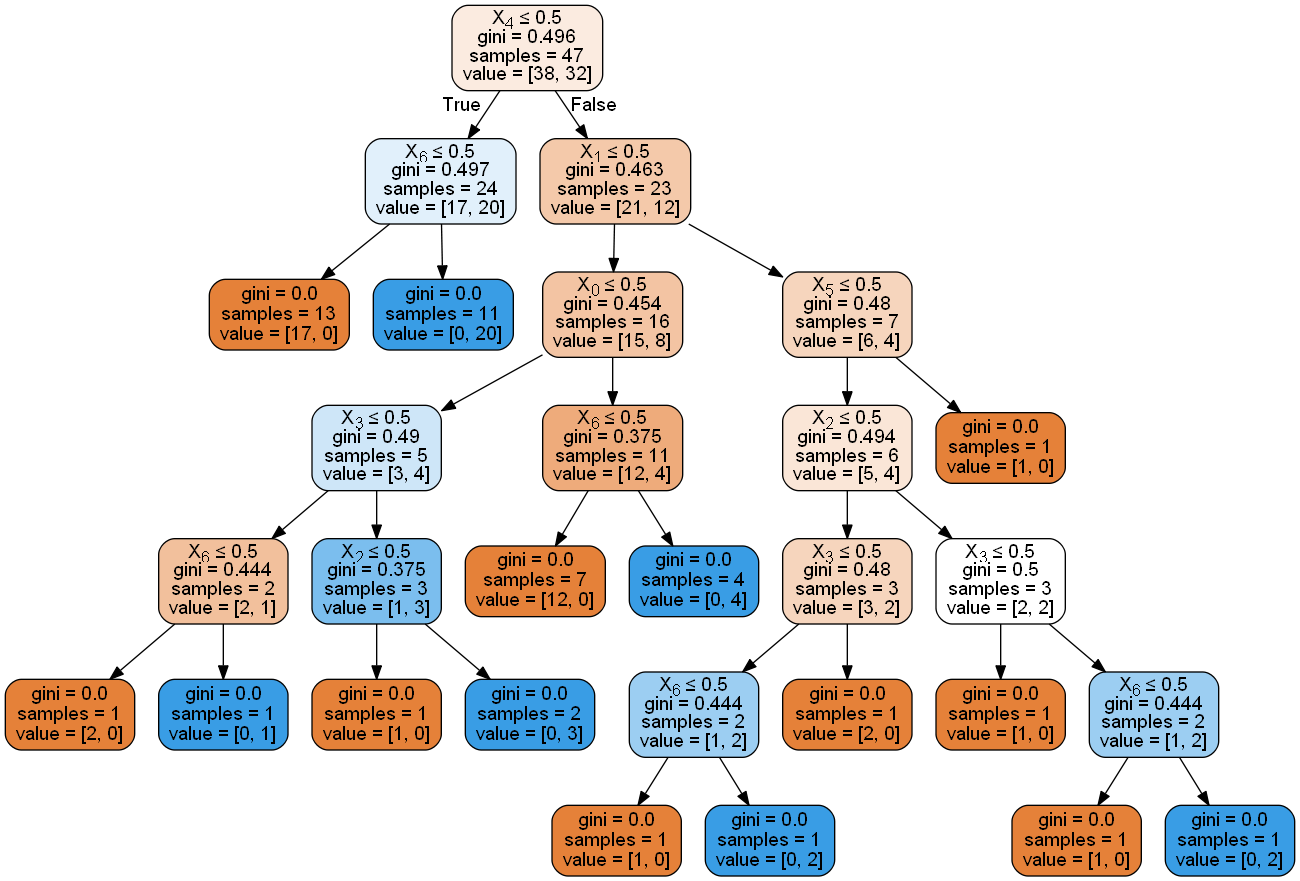

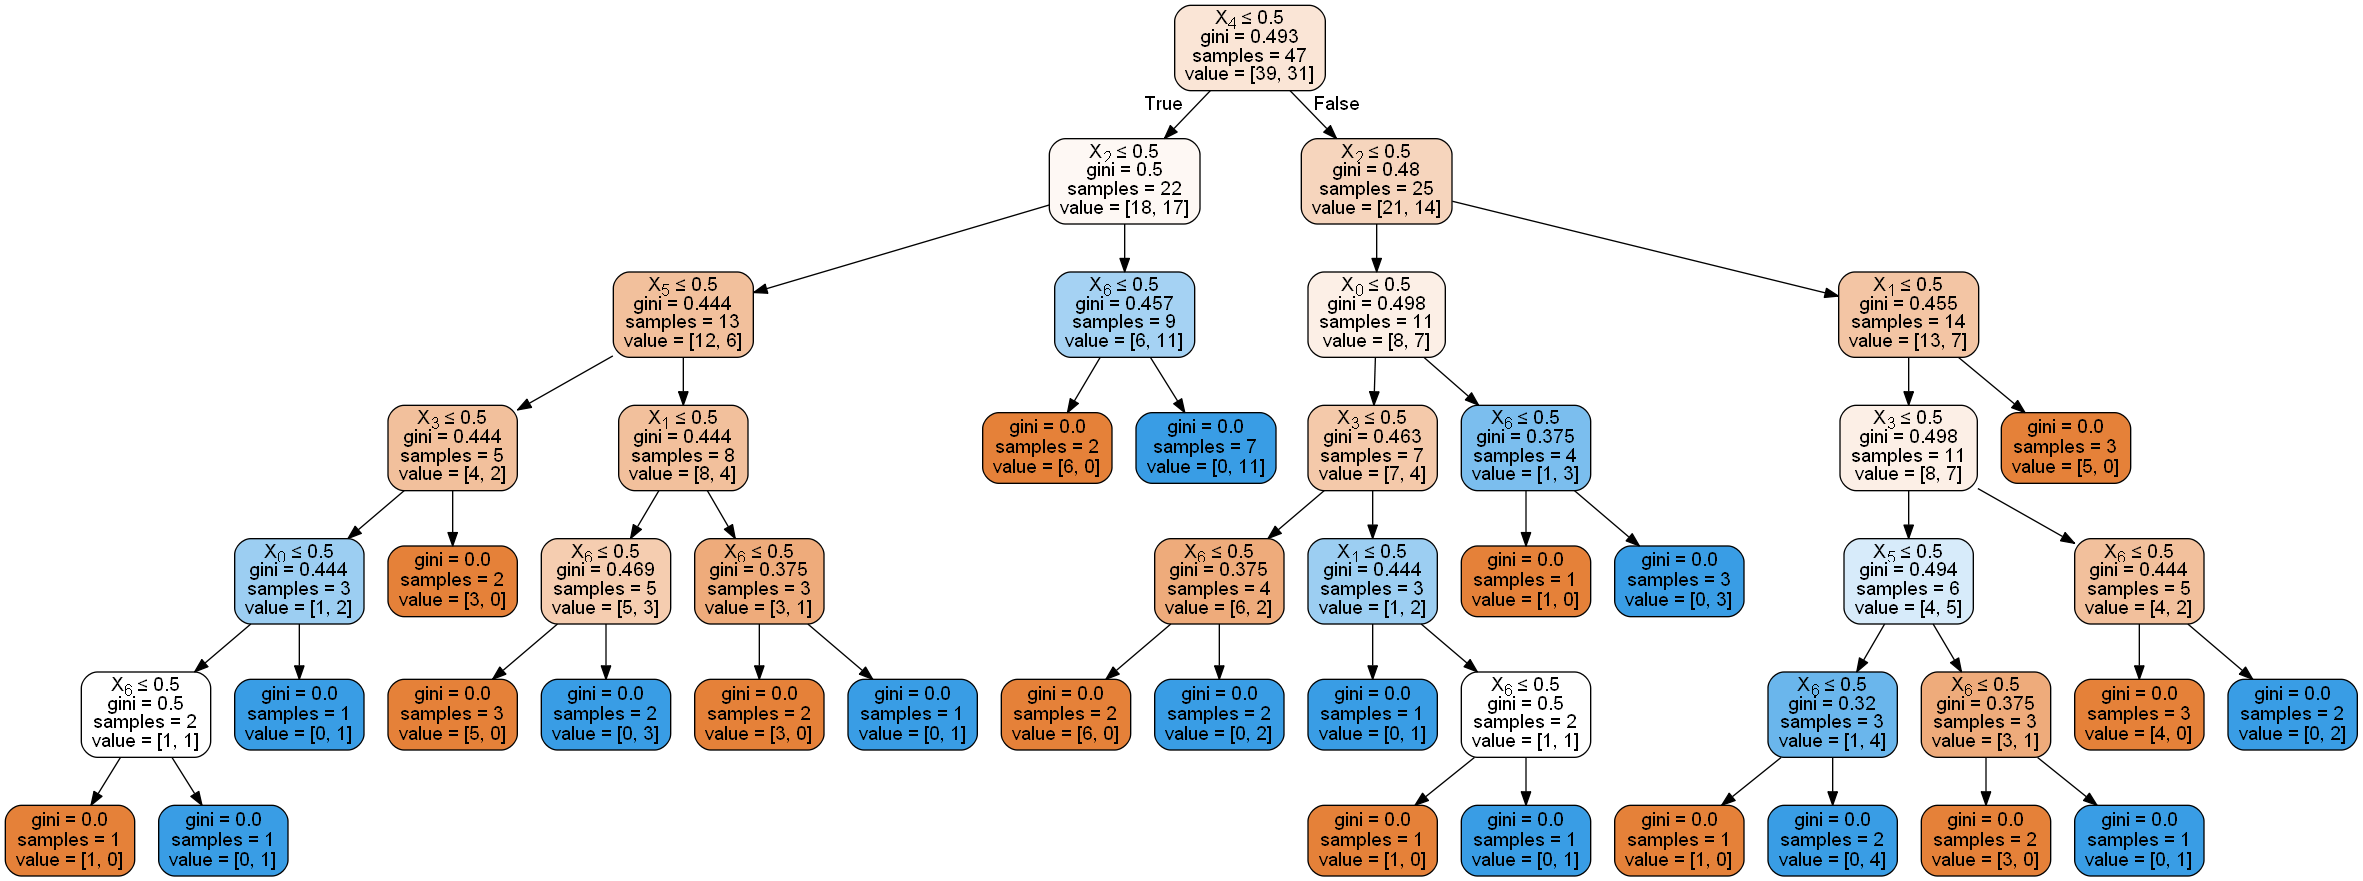

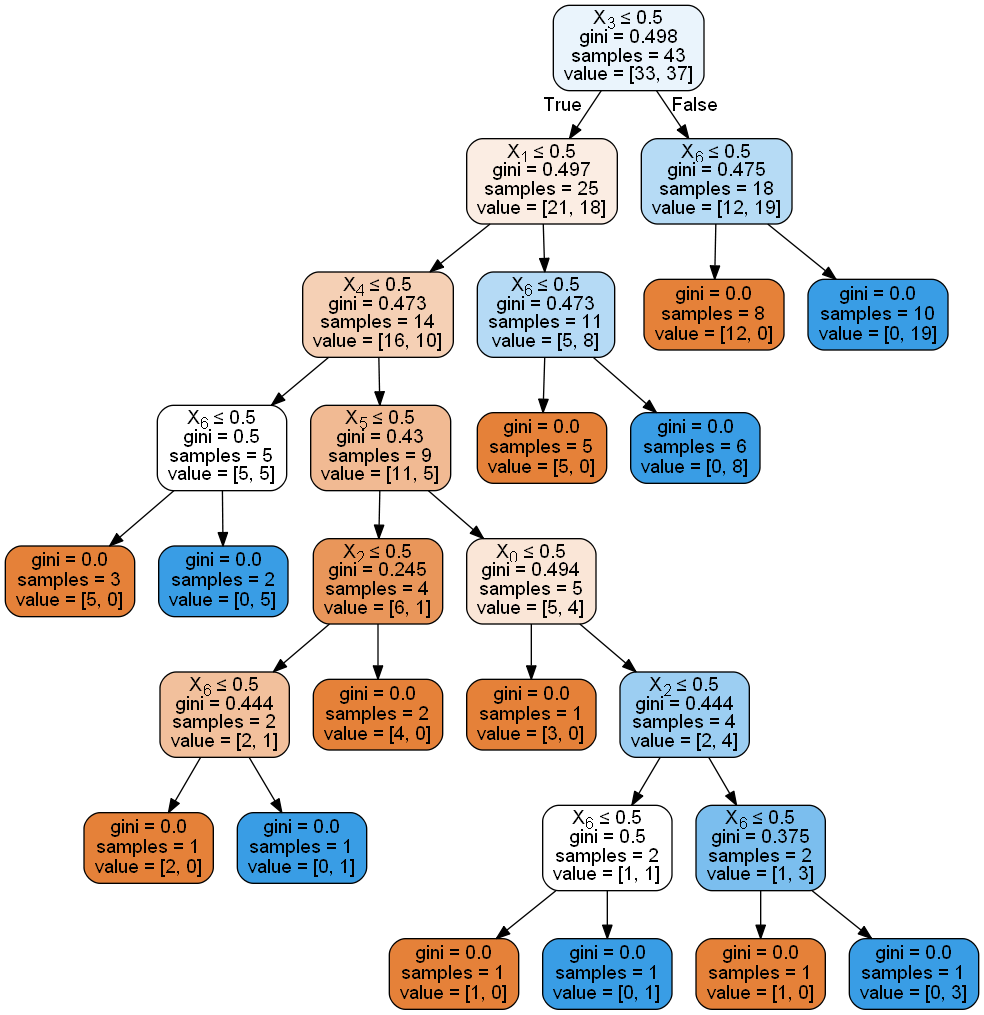

In [19]:
dot_data = StringIO()

i_tree = 0
for tree_in_forest in pipe.get_params()['classifier'].estimators_:
    dot_data = StringIO()
    export_graphviz(tree_in_forest, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,
                   )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display.display(Image(graph.create_png()))

As you can see the trees plotted above, they're uncessary complex and some irrelevant features are used.

Why? In our case, only the feature X<sub>6</sub> (right most binary digit) is useful in classifying the numbers. In fact, all even numbers have X<sub>6</sub>=0, while all odd numbers have X<sub>6</sub>=1.

In our case, the classifier had managed to identify X<sub>6</sub> as an important feature, but due to the noises from other features, it was unable predict correctly all the time. This can be seen by showing the feature importance of each features using `feature_importances_`. Notice how the last feature (X<sub>6</sub>) has almost 80% importance, the highest among all the features.

In [20]:
feature_names = ["X"+str(i) for i in range(7)]
feature_importance = pipe.get_params()['classifier'].feature_importances_.tolist()

pd.DataFrame(
    data={
        "feature_names": feature_names,
        "feature_importance": feature_importance
    }
)

,feature_names,feature_importance
0,X0,0.038308
1,X1,0.028966
2,X2,0.038909
3,X3,0.053511
4,X4,0.017090
5,X5,0.023229
6,X6,0.799986


In reality, we won't know which feature is the most important, and which features are just noise. If only there are ways to automatically deal with it.

### 10. Training Attempt #2 - RandomForestClassifier + Feature Engineering + Feature Selection
> "What is feature selection?"

**Feature selection** is the process of selecting a subset of features manually or automatically to train a model.

The goal of feature selection usually is to:
- Improve model's ability to generalize by removing irrelevant features
- Reduce training time

We wanted to select the features automatically, and while are many feature selections methods that can do just that, we will be using one of the methods.

We will use a univariate feature selection methods, that will peform some statistic test on each feature to the label, and give a p-value, if the p-value is below the alpha, the feature won't be selected.

We will one of the univariate feature selection transformer provided by sklearn `SelectFdr()` where features with low false discovery rate are kept. We will calculate the statistics with `chi2`, as it is suitable for classification problem with non-negative features. There are other methods, but we will use this for this example.

In [21]:
# Binarize
be = BinaryEncoder(n=7)
bin_X = be.fit_transform(X_train, y_train)

# Feature selection
fs = SelectFdr(chi2, alpha=0.05)
fs.fit(bin_X, y_train)

# Show p-values
make_float = lambda x: str("{:,.9f}".format(x))
temp = pd.DataFrame(
    data={
        "feature_names": feature_names,
        "p_values": fs.pvalues_.tolist(),
        "selected?": [(p < 0.05) for p in fs.pvalues_.tolist()],
    }
)
temp["p_values"] = temp["p_values"].apply(make_float) # Make it to show digits

temp

,feature_names,p_values,selected?
0,X0,0.841480581,False
1,X1,0.834827329,False
2,X2,0.857462442,False
3,X3,0.861804433,False
4,X4,0.621873424,False
5,X5,0.865772375,False
6,X6,0.000000003,True


As we can see from the code above, our feature selection method is able to select X<sub>6</sub> as the only important features! Let's now put the feature selection method into our machine learning pipeline and retrain our model!

In [22]:
pipe = Pipeline(
    steps=[
        ('binary_encoder', BinaryEncoder(n=8)),
        ('feature_selector', SelectFdr(chi2, alpha=0.01)),
        ('classifier', RandomForestClassifier(n_estimators=3, random_state=7))
    ]
)


Our pipeline now looks like this:
<div>
    <img src="img/pipeline_02.png" width="50%"/>
</div>

In [23]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('binary_encoder',
                 <__main__.BinaryEncoder object at 0x0000029766968F08>),
                ('feature_selector',
                 SelectFdr(alpha=0.01,
                           score_func=<function chi2 at 0x000002976579E798>)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=3, n_jobs=None,
                                        oob_score=False, rand

In [24]:
y_pred = pipe.predict(X_test)
pd.DataFrame(
    data={
        "number": X_test['number'],
        "label": y_pred
    }
).head()

,number,label
5,5,Odd
93,93,Odd
41,41,Odd
96,96,Even
16,16,Even


In [25]:
accuracy_score(y_test, y_pred)

1.0

Look! We managed to boost our accuracy to 100%! 

In [26]:
pipe.get_params()['classifier'].feature_importances_.tolist()

[1.0]

Let's visualize the trees in our model.

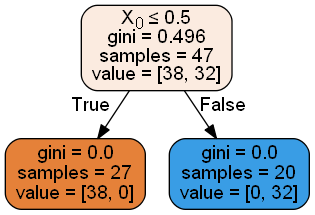

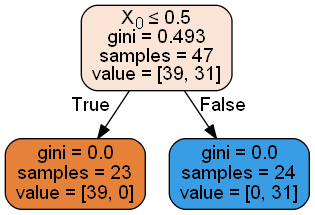

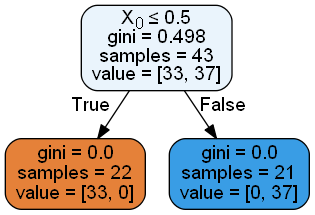

In [27]:
i_tree = 0
for tree_in_forest in pipe.get_params()['classifier'].estimators_:
    dot_data = StringIO()
    export_graphviz(tree_in_forest, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display.display(Image(graph.create_png()))

All of the trees now only considers one features and the irrelevant features are ignored!

Note that, X<sub>0</sub> was previously X<sub>6</sub>, but now it is the only features, thus being 0).

### 11. Serializing our model
Model training is a time consuming process in real life and we can't afford to train it everytime. Instead, we will serialize it and save it to a file, and load it back whenever we need to use it.

We will be using the pickle module for this task.

In [28]:
import pickle

with open('classifier.pkl', 'wb') as f:
    pickle.dump(pipe, f)

### 12. Writing the `isEven()` function, using our model
Finally, now we can now use our model to write the `isEven()` function!

In [3]:
import pickle

def isEven(x):
    # First, load the model
    with open('classifier.pkl', 'rb') as f:
        pipe = pickle.load(f)
    return pipe.predict(np.array([[x]]))[0] == 'Even' # Return True if prediction is `Even`

Let's try our function on some unseen numbers!

In [4]:
for i in [103, 104, 180, 193]:
    print("isEven({}) = {}".format(i, isEven(i)))
    print()

AttributeError: Can't get attribute 'BinaryEncoder' on <module '__main__'>

Note: Numbers that are have more than 7 digits in it's binary form can't work with our classifier!

In [42]:
print("isEven({}) = {}".format(350, isEven(350)))

ValueError: X has a different shape than during fitting.

In [46]:
# This is how a normal human being would write the `isEven()` function
def isEven(x):
    return x % 2 == 0

for i in [103, 104, 180, 193]:
    print("isEven({}) = {}".format(i, isEven(i)))
    print()

isEven(103) = False

isEven(104) = True

isEven(180) = True

isEven(193) = False



## Conclusion
Congratualations! You have now (foolishly) solved the simple problem of classifying a number as even or odd, by applying machine learning!

> What a waste of time? I could've code it in 2 lines, like this:
> ```python
> # This is how a normal human being would write the `isEven()` function
> def isEven(x):
>     return x % 2 == 0
> ```

Well, no. Throughout the tutorial, you have learned:
- how machine learning differs from traditional programming
- how to build and evaluate a machine learning model
- how to build a machine learning pipeline
- the concepts of feature engineering and feature selection

> "But, I already know all these stuffs!". 

Well, at least now you can brag to your friends how you had managed to **force an AI to write simple functions** for you. XD

I hope you learn a thing or two from this tutorial, or at least enjoyed it. Stay tuned for more content on programming!